In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# creditcart.csv 경로에서 ... -> 경로복사 후 ctrl + V 
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv', dtype = np.float32)
#df = pd.read_csv('creditcard.csv', dtype = np.float32)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


##  tensorflow logistic regression vs sklearn LogisticRegression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 데이터 전처리 및 분석

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.867188,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09,-1.071518e-10,-3.214554e-10,...,-1.928732e-09,3.643161e-09,3.214554e-10,1.259033e-09,2.143036e-09,1.034684e-09,1.138488e-10,-1.272427e-10,88.349609,0.001727
std,47488.144531,1.958696e+00,1.651309,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120117,0.041527
min,0.000000,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097605e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273458e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165001,0.000000
max,172792.000000,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519588e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160156,1.000000


In [6]:
# 결측치가 있는 열 확인. 0보다 큰 값이 있으면 NaN이 있는 행이 count된 것임
# 결측치 없음으로 확인됨
df.isna().sum(axis = 0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Class별 개수 count
df.groupby(['Class'])[['Time']].count()

,Time
Class,
0.0,284315
1.0,492


* imbalance data $\Rightarrow$ oversampling / undersampling 또는 학습시 가중치 설정 고려 가능

In [8]:
# X와 y 설정
# X : Time열 제외
# y : target. 'Class'열
X = df.iloc[:, 1:-1]
y = df['Class']

In [9]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998


In [10]:
# dividing X, y into training, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)
print('Size of a training set : {}'.format(X_train.shape[0]))
print('Size of a test set : {}'.format(X_test.shape[0]))
print('Size of the entire data set {}'.format(X.shape[0]))

Size of a training set : 213605
Size of a test set : 71202
Size of the entire data set 284807


## Logistic regression

* tensorflow 이용


In [11]:
import tensorflow as tf

In [12]:
# scaler : MinMaxScaler
scaler = MinMaxScaler()
X_tf = scaler.fit_transform(X)
print(X_tf.shape)
print(X_tf)

(284807, 29)
[[9.3519241e-01 7.6649040e-01 8.8136494e-01 ... 4.1897613e-01
  3.1269664e-01 5.8237929e-03]
 [9.7854203e-01 7.7006662e-01 8.4029853e-01 ... 4.1634512e-01
  3.1342265e-01 1.0470528e-04]
 [9.3521708e-01 7.5311762e-01 8.6814088e-01 ... 4.1548926e-01
  3.1191131e-01 1.4738923e-02]
 ...
 [9.9090487e-01 7.6407969e-01 7.8110206e-01 ... 4.1659316e-01
  3.1258485e-01 2.6421540e-03]
 [9.5420909e-01 7.7285570e-01 8.4958714e-01 ... 4.1851953e-01
  3.1524515e-01 3.8923896e-04]
 [9.4923186e-01 7.6525640e-01 8.4960151e-01 ... 4.1646636e-01
  3.1340083e-01 8.4464857e-03]]


In [13]:
# 여기서 reshape 해주지 않으면 아래 cost_function 식에서 연산 오류가 발생함
y_tf = np.array(y.values, dtype = np.float32).reshape((-1,1))
print(y_tf.shape)
print(y)

(284807, 1)
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
284802    0.0
284803    0.0
284804    0.0
284805    0.0
284806    0.0
Name: Class, Length: 284807, dtype: float32


In [14]:
# W, b
W = tf.Variable(tf.random.normal([29,1], dtype = tf.float32)) # W : input dim(X의 컬럼수) * output dim(y의 output수. 이진분류의 경우 1)
b = tf.Variable(tf.ones([1], dtype = tf.float32)) # b : bias

In [15]:
def hypothesis(x):
  # sigmoid 식을 직접 작성할 경우 tf.math.log(hypothesis(X))의 처리에서 NaN문제가 발생하므로 tf.sigmoid()이용
  z = tf.matmul(x,W) + b
  return tf.sigmoid(z)
print(hypothesis(X_tf).numpy())

[[0.97685146]
 [0.9772225 ]
 [0.966127  ]
 ...
 [0.98155206]
 [0.9845887 ]
 [0.97129816]]


## Cross entropy

* $\displaystyle -\sum_{i=1}^{n}[y_i \log{H_i}+(1-y_i) \log{(1-H_i)}]$

In [16]:
def cost_function(H,Y):
  # Cross entropy식
  cost = -tf.reduce_mean(Y * tf.math.log(H) + (1-Y) * tf.math.log(1-H))
  return cost

#계산예시
print(cost_function(hypothesis(X_tf), y_tf))

tf.Tensor(3.7355182, shape=(), dtype=float32)


In [17]:
# Hyper parameter setting
learning_rate = .001
optimizer = tf.optimizers.SGD(learning_rate)

loss_hist = []
for step in range(2000):
  with tf.GradientTape() as tape:
    pred = hypothesis(X_tf)
    cost = cost_function(pred, y_tf)
    gradients = tape.gradient(cost, [W,b])
  optimizer.apply_gradients(zip(gradients, [W,b]))
  
  loss_hist.append(cost)

  if step % 200 == 0:
    print('step : {}, loss = {}'.format(step, cost.numpy()))
print(W.numpy())
print(b.numpy())

step : 0, loss = 3.735518217086792
step : 200, loss = 1.974420428276062
step : 400, loss = 0.8843432664871216
step : 600, loss = 0.4457279443740845
step : 800, loss = 0.27286821603775024
step : 1000, loss = 0.19097569584846497
step : 1200, loss = 0.1454271823167801
step : 1400, loss = 0.11705788969993591
step : 1600, loss = 0.09792069345712662
step : 1800, loss = 0.08423872292041779
[[-1.1821468 ]
 [-0.70464057]
 [-2.0135825 ]
 [-0.4211797 ]
 [ 0.6181067 ]
 [-1.112518  ]
 [ 0.9087258 ]
 [-0.80097264]
 [ 0.41663662]
 [-0.7012064 ]
 [ 0.39710343]
 [ 0.47302255]
 [-0.69148326]
 [-0.4401329 ]
 [ 0.709804  ]
 [ 0.71355397]
 [-0.68897635]
 [-0.38721523]
 [ 0.79493725]
 [-1.3151577 ]
 [ 2.4592464 ]
 [ 0.0878381 ]
 [-1.2537979 ]
 [ 1.0616412 ]
 [-0.03789743]
 [ 1.1083618 ]
 [-0.01125089]
 [ 0.13240105]
 [ 0.9514579 ]]
[0.37536126]


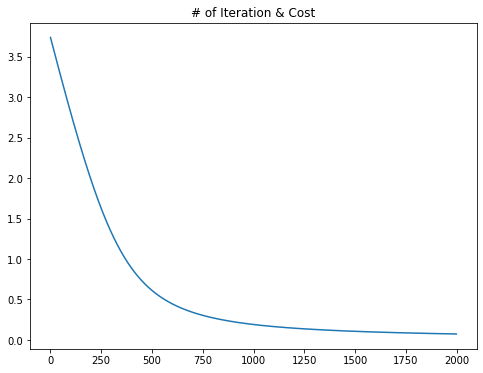

In [18]:
plt.figure(figsize = (8,6))
plt.plot(range(2000), loss_hist)
plt.title('# of Iteration & Cost')
plt.show()

In [ ]:
def predict_function(H):
  return tf.cast(H > .5, dtype = tf.float32)
predict_function(hypothesis(X_tf))

<tf.Tensor: shape=(284807, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
# sklearn의 metrics 이용하여 accuracy, precision, recall, f1-score 계산하기
def print_score(y_true, y_pred):
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  print('accuracy score : {:.4f}'.format(accuracy_score(y_true, y_pred)))
  print('precision score : {:.4f}'.format(precision_score(y_true, y_pred)))
  print('recall score : {:.4f}'.format(recall_score(y_true, y_pred)))
  print('f1 score : {:.4f}'.format(f1_score(y_true, y_pred)))

print_score(y_tf, predict_function(hypothesis(X_tf)).numpy())

accuracy score : 0.9983
precision score : 0.0000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall score : 0.0000
f1 score : 0.0000


In [ ]:
# 약 28만개의 data 중 1로 예측한 개수
predict_function(hypothesis(X_tf)).numpy().sum()

0.0

* scikit learn 이용

In [ ]:
logistic_model = LogisticRegression(random_state = 5, max_iter = 100)
logistic_model.fit(X_train, y_train)
y_prediction = logistic_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# accuracy, precision, recall, f1score 출력 함수 만들기
def print_score(y_true, y_pred):
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  print('accuracy score : {:.4f}'.format(accuracy_score(y_true, y_pred)))
  print('precision score : {:.4f}'.format(precision_score(y_true, y_pred)))
  print('recall score : {:.4f}'.format(recall_score(y_true, y_pred)))
  print('f1 score : {:.4f}'.format(f1_score(y_true, y_pred)))
print_score(y_test,y_prediction)
#accuracy_score(y_true = y_test, y_pred = y_prediction)
#precision_score(y_true, y_pred)
#recall_score(y_true, y_pred)
#f1_score(y_true, y_pred)

accuracy score : 0.9993
precision score : 0.9302
recall score : 0.6612
f1 score : 0.7729


* accuracy, precision score는 높지만 recall score(실제 Fraud인 observation 중 모델이 Fraud라고 예측한 비율)이 낮게 나타남

* Tensorflow의 gradient descent를 이용해 직접 계산한 W, b로는 예측이 나빠진 원인?
 * Solver 차이?

In [ ]:
# imblearn 모듈을 이용한 imbalanced dataset 다루기
# Oversampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
print('Training set의 Fraud data 비율 : {:.4f}'.format(sum(y_train) / len(y_train)))

Training set의 Fraud data 비율 : 0.0017


## RandomOverSampler

* target 데이터의 밸런스를 맞추기 위해 데이터 개수가 부족한 쪽을 oversampling 해줌.

* $\displaystyle  \text{ratio of fraud data} = \frac{\text{sampling_strategy}}{(1 + \text{sampling_strategy})}$

* ex) $\text{sampling_strategy} = 0.5$인 경우 oversampling한 데이터의 fraud data 비중은 $\displaystyle \frac{1}{3}$

In [ ]:
oversample = RandomOverSampler(sampling_strategy = 0.002, random_state = 5)

X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print('0 개수 비율: {}'.format(sum(y_train_over) / len(y_train_over)))
print('1 개수 비율: {}'.format((len(y_train_over) - sum(y_train_over)) / len(y_train_over)))

0 개수 비율: 0.004974335044330378
1 개수 비율: 0.9950256649556696


In [ ]:
logistic_model = LogisticRegression(random_state = 5, max_iter = 100)
logistic_model.fit(X_train_over, y_train_over)
y_prediction = logistic_model.predict(X_test)
print_score(y_test,y_prediction)

accuracy score : 0.9994
precision score : 0.8440
recall score : 0.7603
f1 score : 0.8000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Grid Searching to find the best oversampling weight

precision_scores = []
recall_scores = []
f1_scores = []

sampling_strategies = [0.015, 0.002, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.5]

for sampling_strategy in sampling_strategies:
  #oversampling
  oversample = RandomOverSampler(sampling_strategy = sampling_strategy, random_state = 42)
  X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

  #Fitting logistic model
  logistic_model = LogisticRegression(random_state = 5, max_iter = 100)
  logistic_model.fit(X_train_over, y_train_over)
  y_prediction = logistic_model.predict(X_test)
  precision_scores.append(precision_score(y_test, y_prediction))
  recall_scores.append(recall_score(y_test, y_prediction))
  f1_scores.append(f1_score(y_test, y_prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


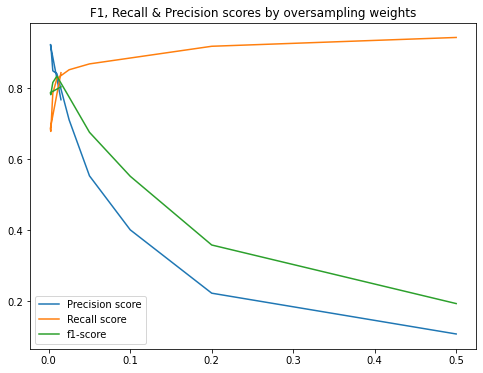

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(sampling_strategies, precision_scores, label = 'Precision score')
plt.plot(sampling_strategies, recall_scores, label = 'Recall score')
plt.plot(sampling_strategies, f1_scores, label = 'f1-score')
plt.title('F1, Recall & Precision scores by oversampling weights')
plt.legend()
plt.show()

In [ ]:
print('f1-score 최대 oversampling weight : {}'.format(sampling_strategies[np.array(f1_scores).argmax()]))

f1-score 최대 oversampling weight : 0.01


* Oversampling 효과로 인해 precision score(Fraud라 예측한 것들 중 실제 Fraud 인 data의 비율)이 크게 떨어짐을 확인함


* Recall score 상승 : 실제 Fraud 중에서 모형이 Fraud라고 detect한 데이터의 비중 상승


* 그래프 확인 시 oversampling weight를 크게 늘릴 수록, recall score 상승효과보다 precision score 하락 효과가 더 커 f1-score는 작아지는 경향을 보이게 됨.
 * F1-score가 최대가 되는 oversampling weight값은 0.01


* 그러나 기존 데이터의 fraud data비율이 0.00497 = 0.497%에 불과했다는 점을 고려하면, 약 $1/101 \approx 1\text{%} $의 oversampling weight를 주는 것이 f1-score 관점에서 성능향상이 있음을 확인할 수 있음.

* minmax scaler 적용하여 logistic regression 수행

In [ ]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510601,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840299,0.271797,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = .25, random_state = 40)

In [ ]:
logistic_model = LogisticRegression(random_state = 5, max_iter = 100)
logistic_model.fit(X_train_scaled, y_train)
y_prediction = logistic_model.predict(X_test_scaled)
print_score(y_test, y_prediction)

accuracy score : 0.9992
precision score : 0.9079
recall score : 0.5702
f1 score : 0.7005


* Recall score가 낮아지며 MinMaxScaling을 적용하지 않았을 때보다 f1-score 측면에서 오히려 성능이 하락함

## ANN

* activation function ReLU, sigmoid

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(50, activation = 'relu', input_dim = X.shape[1])) # input_dim : # of features
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1500      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,651
Trainable params: 6,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
3338/3338 [==============================] - 10s 3ms/step - loss: 0.0086 - accuracy: 0.9986
Epoch 2/10
3338/3338 [==============================] - 8s 2ms/step - loss: 0.0042 - accuracy: 0.9992
Epoch 3/10
3338/3338 [==============================] - 9s 3ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 4/10
3338/3338 [==============================] - 10s 3ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 5/10
3338/3338 [==============================] - 9s 3ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 6/10
3338/3338 [==============================] - 9s 3ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 7/10
3338/3338 [==============================] - 9s 3ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 8/10
3338/3338 [==============================] - 9s 3ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 9/10
3338/3338 [==============================] - 9s 3ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 10/10
3338/3338 [==============================] - 10s 3ms/step - loss: 0.

In [ ]:
loss, train_acc = model.evaluate(X_test_scaled, y_test, verbose = 0)
print('train acc : {:.5f}'.format(train_acc))

train acc : 0.99949


In [ ]:
y_prediction_ANN = model.predict(X_test_scaled) # [[0.87],[0.001], ... ]
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)  # y_prediction_ANN의 각 원소가 []로 감싸져있으므로 reshape처리해야 where가 정상실행
print_score(y_true = y_test, y_pred = y_prediction_ANN)

2226/2226 [==============================] - 3s 1ms/step
accuracy score : 0.9995
precision score : 0.8571
recall score : 0.8430
f1 score : 0.8500


* Logistic regression을 이용한 예측보다 recall score 및 f1 score가 크게 향상

# Dropout method

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(50, activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
3338/3338 [==============================] - 12s 3ms/step - loss: 0.0149 - accuracy: 0.9975
Epoch 2/10
3338/3338 [==============================] - 11s 3ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 3/10
3338/3338 [==============================] - 12s 3ms/step - loss: 0.0068 - accuracy: 0.9990
Epoch 4/10
3338/3338 [==============================] - 13s 4ms/step - loss: 0.0064 - accuracy: 0.9990
Epoch 5/10
3338/3338 [==============================] - 11s 3ms/step - loss: 0.0057 - accuracy: 0.9990
Epoch 6/10
3338/3338 [==============================] - 13s 4ms/step - loss: 0.0059 - accuracy: 0.9990
Epoch 7/10
3338/3338 [==============================] - 11s 3ms/step - loss: 0.0057 - accuracy: 0.9991
Epoch 8/10
3338/3338 [==============================] - 12s 4ms/step - loss: 0.0055 - accuracy: 0.9991
Epoch 9/10
3338/3338 [==============================] - 12s 4ms/step - loss: 0.0055 - accuracy: 0.9991
Epoch 10/10
3338/3338 [==============================] - 11s 3ms/step - l

In [ ]:
y_prediction_ANN = model.predict(X_test_scaled)
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)  # y_prediction_ANN의 각 원소가 []로 감싸져있으므로 reshape처리해야 where가 정상실행
print_score(y_true = y_test, y_pred = y_prediction_ANN)

2226/2226 [==============================] - 4s 2ms/step
accuracy score : 0.9996
precision score : 0.9083
recall score : 0.8182
f1 score : 0.8609


## Note

* Precision score : Fraud라고 예측한 것 중 실제로 Fraud인 것
(실제 Fraud / (실제 Fraud + Fraud가 아니지만 Fraud라 예측))


* Recall score : 실제 Fraud인 것 중 모형이 Fraud라 예측한 것


## Interpretation

* Precision score 대비 Recall score가 낮게나오면서 전체적인 f1 score가 떨어짐..
 * $\rightarrow$ 실제로 Fraud인 것을 모형이 Fraud라고 제대로 예측하지 못하고 정상거래라고 오인했다는 것

---
## Early stopping method

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Without applying early stopping method

# divide the training set into a training set and a validation set

X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size = .2, random_state = 40)

model = Sequential()
model.add(Dense(50, activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs = 10, batch_size = 128)

y_prediction_ANN = model.predict(X_test_scaled)
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)  # y_prediction_ANN의 각 원소가 []로 감싸져있으므로 reshape처리해야 where가 정상실행
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/10
1336/1336 [==============================] - 6s 4ms/step - loss: 0.0114 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 2/10
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 3/10
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 4/10
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 5/10
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9991
Epoch 6/10
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 7/10
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy:

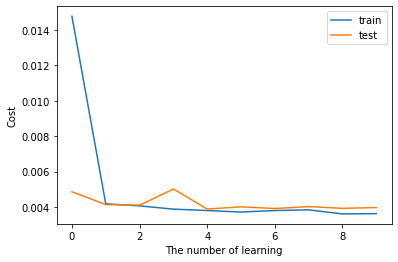

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(50, activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 3)
history = model.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs = 30, batch_size = 128, callbacks = [es])

y_prediction_ANN = model.predict(X_test_scaled)
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)  # y_prediction_ANN의 각 원소가 []로 감싸져있으므로 reshape처리해야 where가 정상실행
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/30
1336/1336 [==============================] - 6s 4ms/step - loss: 0.0120 - accuracy: 0.9986 - val_loss: 0.0060 - val_accuracy: 0.9989
Epoch 2/30
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 3/30
1336/1336 [==============================] - 6s 5ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 4/30
1336/1336 [==============================] - 7s 5ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 5/30
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 6/30
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 7/30
1336/1336 [==============================] - 5s 4ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy:

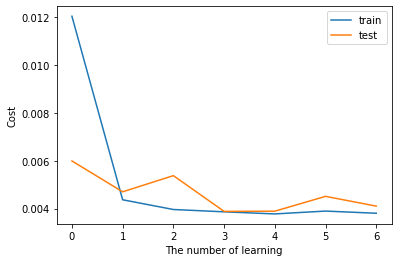

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
# Dropout + EarlyStopping
model = Sequential()
model.add(Dense(50, activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))

model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
history = model.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs = 30, batch_size = 64, callbacks = [es])

y_prediction_ANN = model.predict(X_test_scaled)
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)  # y_prediction_ANN의 각 원소가 []로 감싸져있으므로 reshape처리해야 where가 정상실행
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/30
2671/2671 [==============================] - 17s 6ms/step - loss: 0.0135 - accuracy: 0.9981 - val_loss: 0.0045 - val_accuracy: 0.9983
Epoch 2/30
2671/2671 [==============================] - 12s 4ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0043 - val_accuracy: 0.9990
Epoch 3/30
2671/2671 [==============================] - 11s 4ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 4/30
2671/2671 [==============================] - 12s 4ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 5/30
2671/2671 [==============================] - 11s 4ms/step - loss: 0.0052 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy: 0.9991
Epoch 6/30
2671/2671 [==============================] - 13s 5ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 7/30
2671/2671 [==============================] - 11s 4ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0041 - val_ac

* Weight balancing
cf : https://3months.tistory.com/414

In [ ]:
sum(y) / len(y)

0.001727485630620034

In [ ]:
# Dropout + EarlyStopping + Weight
#class_weight = {0. : sum(y) / len(y), 1. : 1 - sum(y) / len(y)}

# 학습시 Fraud data에 2.5배의 weight를 부여함
class_weight = {0. : 1, 1. : 2.5}

model = Sequential()
model.add(Dense(50, activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
history = model.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs = 100, batch_size = 256, class_weight = class_weight)

y_prediction_ANN = model.predict(X_test_scaled)
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)  # y_prediction_ANN의 각 원소가 []로 감싸져있으므로 reshape처리해야 where가 정상실행
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/100
668/668 [==============================] - 5s 6ms/step - loss: 0.0333 - accuracy: 0.9974 - val_loss: 0.0047 - val_accuracy: 0.9983
Epoch 2/100
668/668 [==============================] - 4s 6ms/step - loss: 0.0119 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 3/100
668/668 [==============================] - 4s 6ms/step - loss: 0.0097 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 4/100
668/668 [==============================] - 5s 7ms/step - loss: 0.0094 - accuracy: 0.9992 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 5/100
668/668 [==============================] - 4s 7ms/step - loss: 0.0090 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9990
Epoch 6/100
668/668 [==============================] - 4s 6ms/step - loss: 0.0088 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 7/100
668/668 [==============================] - 4s 5ms/step - loss: 0.0087 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9993

In [ ]:
# Dropout + EarlyStopping + Weight
#class_weight = {0. : sum(y) / len(y), 1. : 1 - sum(y) / len(y)}

# 학습시 Fraud data에 3배의 weight를 부여함
class_weight = {0. : 1, 1. : 3}

model = Sequential()
model.add(Dense(50, activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
history = model.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs = 100, batch_size = 256, class_weight = class_weight)

y_prediction_ANN = model.predict(X_test_scaled)
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)  # y_prediction_ANN의 각 원소가 []로 감싸져있으므로 reshape처리해야 where가 정상실행
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/100
668/668 [==============================] - 6s 8ms/step - loss: 0.0432 - accuracy: 0.9953 - val_loss: 0.0063 - val_accuracy: 0.9983
Epoch 2/100
668/668 [==============================] - 6s 8ms/step - loss: 0.0146 - accuracy: 0.9982 - val_loss: 0.0059 - val_accuracy: 0.9983
Epoch 3/100
668/668 [==============================] - 4s 6ms/step - loss: 0.0138 - accuracy: 0.9986 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 4/100
668/668 [==============================] - 4s 6ms/step - loss: 0.0137 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 5/100
668/668 [==============================] - 4s 6ms/step - loss: 0.0127 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 6/100
668/668 [==============================] - 4s 6ms/step - loss: 0.0124 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 7/100
668/668 [==============================] - 4s 6ms/step - loss: 0.0121 - accuracy: 0.9993 - val_loss: 0.0048 - val_accuracy: 0.9992

In [ ]:
# Dropout + EarlyStopping + Weight
#class_weight = {0. : sum(y) / len(y), 1. : 1 - sum(y) / len(y)}

# 학습시 Fraud data에 2배의 weight를 부여함
class_weight = {0. : 1, 1. : 2}

model = Sequential()
model.add(Dense(50, activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
history = model.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs = 100, batch_size = 128, class_weight = class_weight)

y_prediction_ANN = model.predict(X_test_scaled)
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)  # y_prediction_ANN의 각 원소가 []로 감싸져있으므로 reshape처리해야 where가 정상실행
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/100
1336/1336 [==============================] - 8s 6ms/step - loss: 0.0251 - accuracy: 0.9980 - val_loss: 0.0048 - val_accuracy: 0.9983
Epoch 2/100
1336/1336 [==============================] - 7s 5ms/step - loss: 0.0109 - accuracy: 0.9982 - val_loss: 0.0048 - val_accuracy: 0.9983
Epoch 3/100
1336/1336 [==============================] - 7s 5ms/step - loss: 0.0113 - accuracy: 0.9986 - val_loss: 0.0049 - val_accuracy: 0.9991
Epoch 4/100
1336/1336 [==============================] - 7s 5ms/step - loss: 0.0109 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 5/100
1336/1336 [==============================] - 7s 5ms/step - loss: 0.0100 - accuracy: 0.9991 - val_loss: 0.0127 - val_accuracy: 0.9966
Epoch 6/100
1336/1336 [==============================] - 7s 5ms/step - loss: 0.0093 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 7/100
1336/1336 [==============================] - 7s 5ms/step - loss: 0.0102 - accuracy: 0.9992 - val_loss: 0.0041 - val_ac

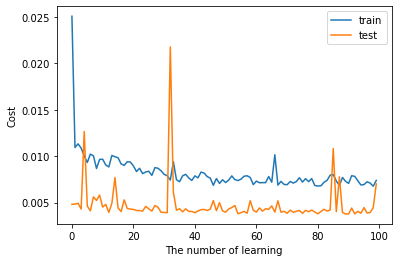

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

## Variable Selection
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Validation set 만들면서 Training set개수 줄어들었던 것 복구
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = .25, random_state = 40)

model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state = 5)
model_rf.fit(X_train_scaled, y_train)
rf_prediction = model_rf.predict(X_test_scaled)
print_score(y_test, rf_prediction)

accuracy score : 0.9996
precision score : 0.9596
recall score : 0.7851
f1 score : 0.8636


In [ ]:
# oversampling
model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state = 5)
oversample = RandomOverSampler(sampling_strategy = 0.025, random_state = 5)
X_train_over, y_train_over = oversample.fit_resample(X_train_scaled, y_train)
model_rf.fit(X_train_over, y_train_over)
rf_prediction = model_rf.predict(X_test_scaled)
print_score(y_test, rf_prediction)

accuracy score : 0.9995
precision score : 0.8729
recall score : 0.8512
f1 score : 0.8619


In [ ]:
importances = model_rf.feature_importances_
indices_sorted = np.argsort(importances)
print(importances)
indices_sorted #importances 값이 작은 것부터 정렬함. 12번째의 importance가 가장 작다는 의미

[0.00408407 0.00347991 0.04344261 0.05224989 0.00184435 0.01017887
 0.00997738 0.00222614 0.03296547 0.18354044 0.06441764 0.11550203
 0.00082348 0.21310039 0.00034033 0.06569343 0.13789528 0.04120858
 0.00226359 0.0012557  0.00316    0.00026977 0.00117748 0.00056084
 0.0002616  0.0007032  0.00428927 0.00195155 0.00113673]


array([24, 21, 14, 23, 25, 12, 28, 22, 19,  4, 27,  7, 18, 20,  1,  0, 26,
        6,  5,  8, 17,  2,  3, 10, 15, 11, 16,  9, 13])

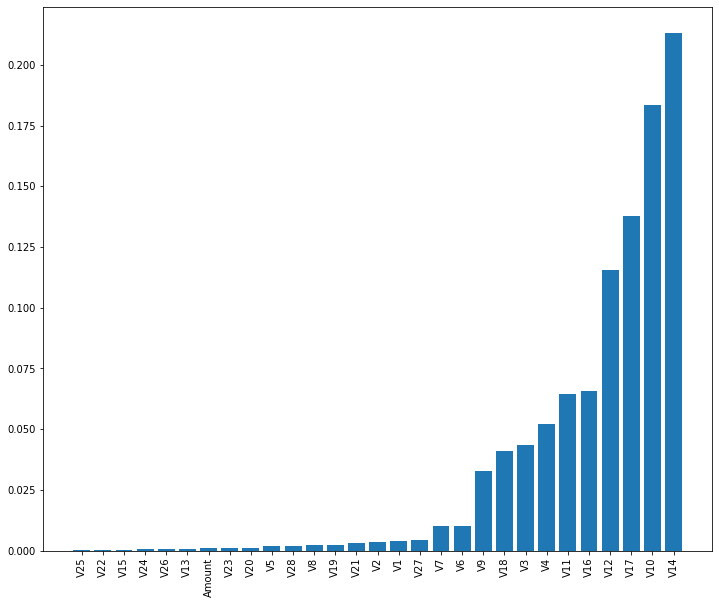

In [ ]:
plt.figure(figsize = (12,10))
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation = 90)
plt.show()

* Random Forest를 이용한 feature importance가 상위 4개인 것만 이용.

In [ ]:
usecol = X.columns[indices_sorted[-4:]]

In [ ]:
# Early stopping 적용을 위한 validation set 다시 만들기
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size = .2, random_state = 45)

In [ ]:
# Hidden layer의 개수를 5개, Dropout과 Earlystopping 기법 적용
model = Sequential()
model.add(Dense(30, activation = 'relu', input_dim = len(usecol)))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
history = model.fit(X_train_scaled[usecol], y_train, validation_data = (X_val_scaled[usecol], y_val), epochs = 50, batch_size = 512, callbacks = [es])

y_prediction_ANN = model.predict(X_test_scaled[usecol])
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/50
418/418 [==============================] - 3s 6ms/step - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.0113 - val_accuracy: 0.9983
Epoch 2/50
418/418 [==============================] - 2s 5ms/step - loss: 0.0143 - accuracy: 0.9983 - val_loss: 0.0095 - val_accuracy: 0.9983
Epoch 3/50
418/418 [==============================] - 2s 5ms/step - loss: 0.0120 - accuracy: 0.9983 - val_loss: 0.0083 - val_accuracy: 0.9983
Epoch 4/50
418/418 [==============================] - 2s 5ms/step - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.0066 - val_accuracy: 0.9983
Epoch 5/50
418/418 [==============================] - 2s 6ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.0051 - val_accuracy: 0.9983
Epoch 6/50
418/418 [==============================] - 4s 9ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0056 - val_accuracy: 0.9983
Epoch 7/50
418/418 [==============================] - 2s 5ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0047 - val_accuracy: 0.9983
Epoch 

In [ ]:
# Batch size 줄이고 learning rate 낮춰봄..
# 적은 데이터로 조금씩 학습하며, 학습수 많아짐
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size = .2, random_state = 45)

model = Sequential()
model.add(Dense(30, activation = 'relu', input_dim = len(usecol)))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(X_train_scaled[usecol], y_train, validation_data = (X_val_scaled[usecol], y_val), epochs = 5, batch_size = 16, callbacks = [es])

y_prediction_ANN = model.predict(X_test_scaled[usecol])
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/5
10681/10681 [==============================] - 33s 3ms/step - loss: 0.0286 - accuracy: 0.9979 - val_loss: 0.0097 - val_accuracy: 0.9985
Epoch 2/5
10681/10681 [==============================] - 36s 3ms/step - loss: 0.0137 - accuracy: 0.9982 - val_loss: 0.0086 - val_accuracy: 0.9985
Epoch 3/5
10681/10681 [==============================] - 34s 3ms/step - loss: 0.0116 - accuracy: 0.9982 - val_loss: 0.0070 - val_accuracy: 0.9985
Epoch 4/5
10681/10681 [==============================] - 33s 3ms/step - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.0052 - val_accuracy: 0.9985
Epoch 5/5
2226/2226 [==============================] - 3s 1ms/step
accuracy score : 0.9983
precision score : 0.0000
recall score : 0.0000
f1 score : 0.0000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Batch size 많이, learning rate 높게
model = Sequential()
model.add(Dense(30, activation = 'relu', input_dim = len(usecol)))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))

model.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
history = model.fit(X_train_scaled[usecol], y_train, validation_data = (X_val_scaled[usecol], y_val), epochs = 30, batch_size = 256, callbacks = [es])

y_prediction_ANN = model.predict(X_test_scaled[usecol])
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/30
668/668 [==============================] - 4s 4ms/step - loss: 0.0403 - accuracy: 0.9939 - val_loss: 0.0103 - val_accuracy: 0.9985
Epoch 2/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0128 - accuracy: 0.9982 - val_loss: 0.0070 - val_accuracy: 0.9985
Epoch 3/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0096 - accuracy: 0.9982 - val_loss: 0.0045 - val_accuracy: 0.9985
Epoch 4/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0080 - accuracy: 0.9982 - val_loss: 0.0045 - val_accuracy: 0.9985
Epoch 5/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0048 - val_accuracy: 0.9985
Epoch 6/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0041 - val_accuracy: 0.9985
Epoch 7/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0037 - val_accuracy: 0.9985
Epoch 

In [ ]:
class_weight = {0. : 1, 1. : 1.25}

model = Sequential()
model.add(Dense(30, activation = 'relu', input_dim = len(usecol)))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(.3))

model.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
history = model.fit(X_train_scaled[usecol], y_train, validation_data = (X_val_scaled[usecol], y_val), epochs = 30, batch_size = 256, callbacks = [es], class_weight = class_weight)

y_prediction_ANN = model.predict(X_test_scaled[usecol])
y_prediction_ANN = np.where(y_prediction_ANN.reshape(-1) > 0.5, 1., 0.)
print_score(y_true = y_test, y_pred = y_prediction_ANN)

Epoch 1/30
668/668 [==============================] - 6s 6ms/step - loss: 0.0435 - accuracy: 0.9917 - val_loss: 0.0094 - val_accuracy: 0.9985
Epoch 2/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0160 - accuracy: 0.9982 - val_loss: 0.0075 - val_accuracy: 0.9985
Epoch 3/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0124 - accuracy: 0.9982 - val_loss: 0.0050 - val_accuracy: 0.9985
Epoch 4/30
668/668 [==============================] - 3s 5ms/step - loss: 0.0096 - accuracy: 0.9982 - val_loss: 0.0047 - val_accuracy: 0.9985
Epoch 5/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0086 - accuracy: 0.9982 - val_loss: 0.0039 - val_accuracy: 0.9985
Epoch 6/30
668/668 [==============================] - 3s 5ms/step - loss: 0.0080 - accuracy: 0.9982 - val_loss: 0.0035 - val_accuracy: 0.9985
Epoch 7/30
668/668 [==============================] - 3s 4ms/step - loss: 0.0079 - accuracy: 0.9982 - val_loss: 0.0039 - val_accuracy: 0.9985
Epoch 

* 중요도 상위 5개 feature 대신 모든 feature를 이용해 학습했을 때, score가 크게 증가하지 않았음


* variable selection을 해도 성능차이가 없으며, 연산량은 크게 감소함을 확인

## Question

* 왜 Tensorflow로 돌린 logistic은 이상한 결과가 나왔는가?

* Epoch수, Batch size, Learning rate, Hidden layer의 수, Neuron의 수 등 결정하는 방법?

* Dropout과 Early stopping의 효과가 미미했는데 이유?

* 학습시 class_weight을 적용해봤는데, 딥러닝에서 imbalance data를 학습할 때 이와 같이 하는게 일반적인지?